<a href="https://colab.research.google.com/github/chanijung/Deep_Learning_Practice/blob/master/CNN_fromFile_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Example FromFile by Keras
* Trains a simple convnet on the MNIST dataset from file(3 Class from Folder). 
* Gets to 0.98% test accuracy after 10 epochs
* Unser 1 seconds per epoch on a GPU.

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models, optimizers
import numpy as np

In [ ]:
from os import listdir
from os.path import isfile, join
from pylab import *
from numpy import *
import os
from skimage.transform import resize

def getFolder(thePath,isFile=True):
    return [f for f in listdir(thePath) if isFile == isfile(join(thePath, f)) ]

def getImagesAndLabels(tPath,isGray=True):
    labels=getFolder(tPath,False)
    tImgDic={f:getFolder(join(tPath,f)) for f in labels}
    tImages,tLabels=None,None
    ks=sorted(list(tImgDic.keys()))
    oh=np.identity(len(ks))
    for label in tImgDic.keys():
        for image in tImgDic[label]:
            le=np.array([float(label)],ndmin=1)
            img_color=imread(join(tPath,label,image))
            img_color=resize(imread(join(tPath,label,image)), (180,240)) #resize the images to the equal size
            if isGray:
                img=img_color[:,:,1]
            img1d=img.reshape([1,-1])
            if tImages is None:
                tImages, tLabels =img1d, le
            else:
                tImages,tLabels = np.concatenate((tImages,img1d),axis=0), np.append(tLabels,le ,axis=0)
    return (tImages,tLabels)



    

In [ ]:
%%bash
rm -r /content/flower_photos/daisy
rm -r /content/flower_photos/dandelion
rm -r /content/flower_photos/0/daisy
rm -r /content/flower_photos/1/dandelion


rm: cannot remove '/content/flower_photos/daisy': No such file or directory
rm: cannot remove '/content/flower_photos/dandelion': No such file or directory
rm: cannot remove '/content/flower_photos/0/daisy': No such file or directory
rm: cannot remove '/content/flower_photos/1/dandelion': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%%bash
rm /content/gdrive
mkdir "/content/drive/My Drive/Colab Notebooks"
ln -s "/content/drive/My Drive/Colab Notebooks" /content/gdrive
cd /content/gdrive

rm: cannot remove '/content/gdrive': No such file or directory
mkdir: cannot create directory ‘/content/drive/My Drive/Colab Notebooks’: File exists


In [ ]:
dir(os)
os.listdir('/content')

['.config', 'drive', 'gdrive', 'sample_data']

In [ ]:
#Assignment - classifying flower photos
%%bash
wget http://download.tensorflow.org/example_images/flower_photos.tgz
tar -xzvf flower_photos.tgz

flower_photos/
flower_photos/roses/
flower_photos/roses/14810868100_87eb739f26_m.jpg
flower_photos/roses/1446090416_f0cad5fde4.jpg
flower_photos/roses/15319767030_e6c5602a77_m.jpg
flower_photos/roses/15032112248_30c5284e54_n.jpg
flower_photos/roses/7211616670_2d49ecb3a5_m.jpg
flower_photos/roses/15674450867_0ced942941_n.jpg
flower_photos/roses/17158274118_00ec99a23c.jpg
flower_photos/roses/14019883858_e5d2a0ec10_n.jpg
flower_photos/roses/8035908422_87220425d2_n.jpg
flower_photos/roses/14747962886_2bff6bb323_m.jpg
flower_photos/roses/4356781875_92c5cd93c0.jpg
flower_photos/roses/8524505546_b242bd4928_n.jpg
flower_photos/roses/9406573080_60eab9278e_n.jpg
flower_photos/roses/6039330368_c30ed224c4_m.jpg
flower_photos/roses/14414100710_753a36fce9.jpg
flower_photos/roses/3292434691_392071d702_n.jpg
flower_photos/roses/5273722065_c85d8543c2_m.jpg
flower_photos/roses/2215318403_06eb99176a.jpg
flower_photos/roses/172311368_49412f881b.jpg
flower_photos/roses/15255964454_0a64eb67fa.jpg
flower_pho

--2020-08-25 15:39:58--  http://download.tensorflow.org/example_images/flower_photos.tgz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.107.128, 2607:f8b0:400e:c0d::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.107.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

     0K .......... .......... .......... .......... ..........  0% 97.9M 2s
    50K .......... .......... .......... .......... ..........  0%  158M 2s
   100K .......... .......... .......... .......... ..........  0% 99.3M 2s
   150K .......... .......... .......... .......... ..........  0%  112M 2s
   200K .......... .......... .......... .......... ..........  0%  121M 2s
   250K .......... .......... .......... .......... ..........  0% 92.3M 2s
   300K .......... .......... .......... .......... ..........  0%  137M 2s
   350K .......... .......... .......... ..

In [ ]:
%%bash
rm flower_photos/LICENSE.txt  
cd flower_photos/
mv daisy      0
mv dandelion  1
rm -rf roses      
rm -rf sunflowers  
rm -rf tulips

In [ ]:
labels = getFolder('flower_photos',False)
print(labels)

['0', '1']


In [ ]:
tPath = 'flower_photos/'
data_images, data_labels = getImagesAndLabels(tPath)
print(data_images.shape, data_labels.shape)


(1531, 43200) (1531,)


In [ ]:
print(np.unique(data_labels, return_counts=True))

(array([0., 1.]), array([633, 898]))


In [ ]:
train_images = np.concatenate((data_images[:500,:], data_images[850:,:]), axis=0).reshape((-1,180,240,1))/255.0
train_labels = np.concatenate((data_labels[:500], data_labels[850:]), axis=0)
test_images = data_images[500:849].reshape((-1,180,240,1))/255.0
test_labels = data_labels[500:849]


In [ ]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(1181, 180, 240, 1) (1181,)
(349, 180, 240, 1) (349,)


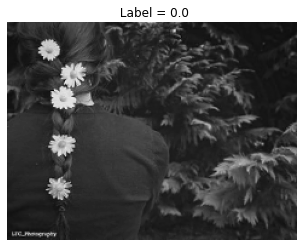

In [ ]:

import matplotlib.pyplot as plt
plt.gray()
plt.axis("off") 
plt.title(" Label = "+str(train_labels[400]) ) 
plt.imshow(train_images[400].reshape(180,240))

# i0=train_images[0]
# print(np.max(i0),np.min(i0),i0.shape,train_labels.shape,train_labels[0])


In [ ]:
#original code

# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(10, activation='softmax'))
# model.summary()


In [ ]:
#original code fitted to this data

# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180,240, 1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(2, activation='softmax'))
# model.summary()

In [ ]:
#ccp-ccp-ff

# model = models.Sequential()
# model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(180,240, 1)))
# model.add(layers.Conv2D(16, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dense(2, activation='softmax'))
# model.summary()

In [ ]:
# model = models.Sequential()
# model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(180,240, 1)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(2, activation='softmax'))
# model.summary()

In [ ]:
#modeled after alexnet

model = models.Sequential()
model.add(layers.Conv2D(64, (10, 10), strides=(4,4), activation='relu', input_shape=(180,240, 1)))
model.add(layers.MaxPooling2D((3, 3), strides=(2,2)))
model.add(layers.Conv2D(128, (5, 5), strides=(1,1), activation='relu'))
model.add(layers.MaxPooling2D((3, 3), strides=(2,2)))
model.add(layers.Conv2D(256, (3, 3), strides=(1,1), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), strides=(1,1), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), strides=(1,1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 43, 58, 64)        6464      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 28, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 24, 128)       204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 11, 128)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 9, 256)         295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 7, 256)         590080    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 5, 128)         2

In [ ]:
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# model.fit(train_images, train_labels, epochs=10)

In [ ]:
# model.compile(optimizer='SGD',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# model.fit(train_images, train_labels, epochs=10)

In [ ]:
#Finding the best learning rate

# np.random.seed(1)
# best_acc = 0
# best_lr = 0
# for i in range(5):
#   lr = 10**(np.random.uniform(-5,-4))
#   model.compile(optimizer=optimizers.Adam(learning_rate=lr),
#                 loss='sparse_categorical_crossentropy',
#                 metrics=['accuracy'])
#   history = model.fit(train_images, train_labels, epochs=10, verbose=0)
#   score = model.evaluate(test_images, test_labels, verbose=0)
#   print('\nlearning rate: ', lr)
#   print('Test loss:', score[0])
#   print('Test accuracy:', score[1])
#   if score[1]>best_acc:
#     best_acc = score[1]
#     best_lr = lr
# print(f'\nbest_acc: {best_acc}, best_lr: {best_lr}')

In [ ]:
lr = 10**(-4.28)
model.compile(optimizer=optimizers.Adam(learning_rate=lr),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=100, verbose=1)
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/100
37/37 [==============================] - 1s 14ms/step - loss: 0.6892 - accuracy: 0.5766
Epoch 2/100
37/37 [==============================] - 0s 10ms/step - loss: 0.6829 - accuracy: 0.5766
Epoch 3/100
37/37 [==============================] - 0s 10ms/step - loss: 0.6832 - accuracy: 0.5766
Epoch 4/100
37/37 [==============================] - 0s 10ms/step - loss: 0.6820 - accuracy: 0.5766
Epoch 5/100
37/37 [==============================] - 0s 10ms/step - loss: 0.6822 - accuracy: 0.5766
Epoch 6/100
37/37 [==============================] - 0s 10ms/step - loss: 0.6818 - accuracy: 0.5766
Epoch 7/100
37/37 [==============================] - 0s 10ms/step - loss: 0.6812 - accuracy: 0.5766
Epoch 8/100
37/37 [==============================] - 0s 10ms/step - loss: 0.6830 - accuracy: 0.5766
Epoch 9/100
37/37 [==============================] - 0s 10ms/step - loss: 0.6830 - accuracy: 0.5766
Epoch 10/100
37/37 [==============================] - 0s 10ms/step - loss: 0.6810 - accuracy: 0.5766

In [ ]:

score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.583017885684967
Test accuracy: 0.7020057439804077
